# Homework 3

## ASTR 5900, Fall 2017, University of Oklahoma

### Basic Statistics II

Remember to save this document as `hw-<FirstLast>.ipynb` when you commit it to your homework repository.

# Problem 1

In X-ray and Gamma-ray astronomy, it often happens that the number of
photons recorded from an object are few.  This makes sense
energetically, as each X-ray or gamma-ray photon carries much more
energy than an optical or infrared photon.  But in many cases, each
photon is detected and counted separately.  

The Poission distribution is a discrete probability distribution that
expresses the probability of a given number of events (photons) in
some bin (e.g., time, spectral, or spatial bin), and is therefore
applicable to X-ray astronomy.  The central limit theorem indicates
that the Poisson distribution approaches the Gaussian for a large
number of photons in a bin, and in that case, Gaussian estimators
(mean and standard deviation) can be used to determine the number of
counts in the bin, and the uncertainty on the number of counts in the
bin.  The problem arises when there are few counts in a bin, i.e.,
when the rate is not high enough that the central limit theorem would
apply.

### Part A

Sample $10^4$ points from Poission distributions with counts per bin = 1, 3, 5, 9, and 15.
Plot a histogram of the resulting distributions.  Overlay the Gaussian distribution for the estimated mean and standard deviation.  Perform the plotting with `matplotlib`.

It should go without saying you will want to write a Python function that does the plotting for a single bin count.

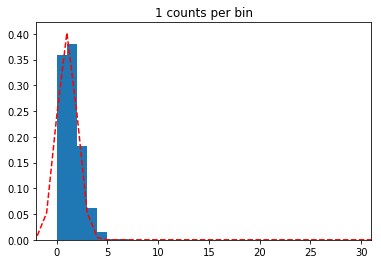

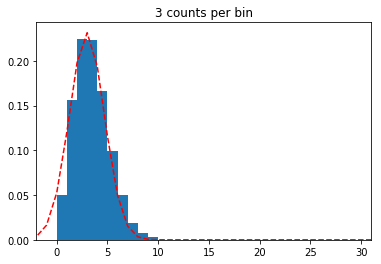

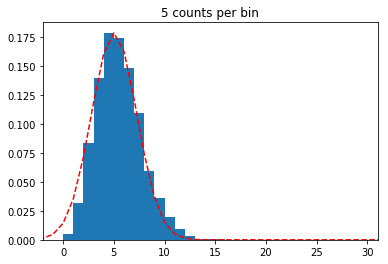

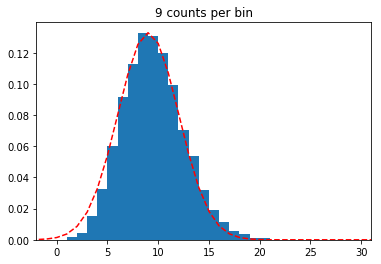

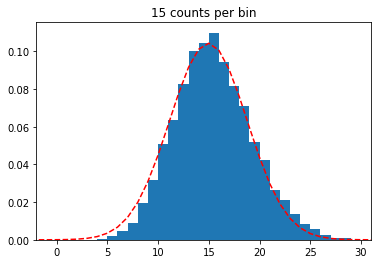

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab

def poi(lam):
    return np.random.poisson(lam=lam,size=10000)
def gauss(x,mu,sigma,A=1/np.sqrt(np.pi*2)):
    return A*np.exp(-(x-mu)**2/2./sigma**2)/sigma

countspbin = [1,3,5,9,15]

plt.clf()
plt.figure()
for i,j in enumerate(countspbin):
    s = poi(j)
    avg = np.average(s)
    std = np.std(s)
    bins = np.arange(30)
    
    counts,bins,ignore = plt.hist(s,bins,normed=1,histtype='stepfilled',label='{} counts per bin'.format(j))
    plt.title('{} counts per bin'.format(j))
    x = -20+np.arange(60)
    plt.plot(x,gauss(x,avg,std,),'r--')
    plt.xlim([bins[0]-2,bins[len(bins)-1]+2])

    plt.show()

## Reflection

Please comment on the reliability of the Gaussian approximation for the poission distriubtion in the markdown cell below.  Specifically, are some portions of the Gaussian approximation unphysical?

The gaussian doesn't really fit the poisson distribution well. The wings of the gaussian aren't well fitted because a gaussian is assuming we can take an infinite number of variables or counts. Also, since the gaussian wings sample below 0 counts/bin, these values are unphysical since there cannot be negative number of counts.

### Part B

Based on your analysis above, what is the average rate of photons in a bin that you need to obtain in order that the Gaussian distribution be an acceptable approximation of the Poisson distribution.  Answers that include a quantitative discussion will receive more points.

Hint 1: one way to compare a number histogram with the Gaussian distribution is with the RMS error, i.e., 
$$E_{RMS}=\sqrt{E(\mathbf{w})/N}$$

where 

$$E(\mathbf) = \frac{1}{2} \sum_{n=1}^N \{y(x_n,\mathbf{w})-t_n\}^2$$

where $y(x_n,\mathbf{w})$ is the predictions (model), and $t_n$ is the data.

Hint 2: Another way to compare a number histogram with a Gaussian distribution is with $\chi^2$.

In [2]:
def Erms(data,model):
    error = 0.5 * np.sum((data - model)**2)
    return np.sqrt(2.*error/len(x))

plt.clf()
plt.figure()
errorarray=[]
for i,j in enumerate(countspbin):
    s = poi(j)
    avg = np.average(s)
    std = np.std(s)
    bins = np.arange(30)
    
    counts,bins,ignore = plt.hist(s,bins,normed=1,histtype='stepfilled',label='{} counts per bin'.format(j))
    plt.title('{} counts per bin'.format(j))
    x = -20+np.arange(60)
    plt.plot(x,gauss(x,avg,std,),'r--')
    plt.xlim([bins[0]-2,bins[len(bins)-1]+2])
    
    errorbins = Erms(counts,gauss(bins[:-1],avg,std,))
    errorarray.append(errorbins)

    #plt.show()
    
print("Error: {}".format(errorarray))

Error: [0.017905735338707086, 0.0069169474765777891, 0.0050506313572705195, 0.0036962672103623318, 0.0028933899224372109]


### Discussion

I would say the 9 counts per bin would be acceptable as the error is <0.005.

# Problem 2

Say you have an ensemble of similarly prepared systems composed of 2 electrons each.  The wave functions for these two particles, $\psi_1(x)$ and $ \psi_2(x)$, are interpreted as probability amplitudes such that 
$$ |\psi_i(x)|^2 = \rho_i(x)$$
where $\rho_i$ is the probablity density that electron $i$ is at position $x$.  These densities are Gaussian with $\mu_1 = 3, \sigma_1^2 = 1.5$ and $\mu_2 = 2, \sigma_2^2 = 2.$  Note however that the electrons *interact* so there is a non-zero covariance between the random variables: $\text{Cov}(X_i, X_j) = \text{Cov}(X_j,X_i) = 1$

### Part A

Calculate the probability that $-1 \leq x_1 \leq 3$ and $1 \leq x_2 \leq 4$ via a naive method: assume the random variables are independent and determine the joint probability by integrating the simple product of the densities (1d Gaussians).  **Hint**: Perform the integration(s) numerically by sampling points from the correct distribution and finding the fraction of sampled points that meet their respective criteria.

In [9]:
mu1, sig1 = 3., 1.5
mu2, sig2 = 2., 2.

x1mi, x1ma = -1., 3.
x2mi, x2ma =  1., 4.

distr = 10000

x_1 = np.random.normal(mu1, np.sqrt(sig1), distr)
x_2 = np.random.normal(mu2, np.sqrt(sig2), distr)

prob1 = len(np.where((x_1 >= x1mi) & (x_1 <= x1ma))[0])/float(distr)
prob2 = len(np.where((x_2 >= x2mi) & (x_2 <= x2ma))[0])/float(distr)

print("Total Probability: {}".format(prob1*prob2))

Total Probability: 0.34022302000000004


### Part B

Calculate the probability that $-1 \leq x_1 \leq 3$ and $1 \leq x_2 \leq 4$ with a bivariate Gaussian distribution.  **Hint**:  Use `numpy` or `scipy` routines to sample from a bivariate normal distribution.  You will have to perform a double integral rather than 2 single integrals as before.  Again, this is to be performed numerically.

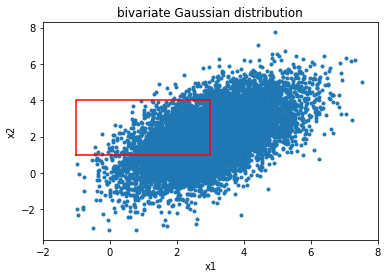

Probability: 0.2936


In [10]:
mu = np.array([mu1,mu2])
cov = np.array([[sig1,1],[1,sig2]])

x1mi, x1ma = -1, 3
x2mi, x2ma = 1, 4
region = np.array([[-1,-1,3,3,-1],[1,4,4,1,1]])
x1, x2 = np.random.multivariate_normal(mu,cov,distr).T

plt.clf()
plt.plot(x1,x2,'.')
plt.plot(region[0],region[1],'r')
# select out points, first one and then feed into next
points1 = np.where((x1>= x1mi) & (x1 <= x1ma))[0]
points2 = x2[points1]

probability = len(np.where((points2 >= x2mi) & (points2 <= x2ma))[0])/float(distr)

plt.title("bivariate Gaussian distribution")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2,8)
plt.show()

print("Probability: {}".format(probability))

### Part C

You should have received different results from the previous 2 parts.  However, both methods are identical if the 'coordinate system' is rotated in a certain way.

Rotate your previous sampled points such that your new covariance matrix is diagonal i.e. your variables can be treated as independent.  Consider the possibility of $-2 \leq u_1 \leq 0$ and $-4 \leq u_2 \leq 4$ where $u_i$ is the position of particle $i$ in the NEW coordinates.  Plot the boundary of this region over your distribution.  You may consider doing this plotting for the previous parts.

Calculate the probability that the position of the particle is found in this new region first through the method of Part A, then through the method of Part B.  Succinctly discuss your results.  **Hint**: Find new coordinates by rotating around the mode of the bivariate Gaussian.

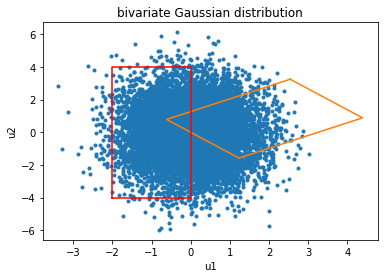

In [12]:
u1mi, u1ma = -2,0
u2mi, u2ma = -4,4

#compute eig vals to use later for the rotation
eigval, eigvect = np.linalg.eig(cov)

# combine into large list
x = np.asarray([x1,x2])

y = np.dot(eigvect.T, x - mu[:,np.newaxis])
rotregion = np.dot(eigvect.T, region - mu[:,np.newaxis])
newregion = np.array([[-2,-2,0,0,-2],[-4,4,4,-4,-4]])

plt.clf()
plt.plot(y[0,:],y[1,:],'.')
plt.plot(rotregion[0],rotregion[1])
plt.plot(newregion[0],newregion[1],'-r')
plt.title("bivariate Gaussian distribution")
plt.xlabel("u1")
plt.ylabel("u2")
plt.show()

#### Method 1

In [13]:
u_1 = np.random.normal(0,np.sqrt(eigval[0]),distr)
u_2 = np.random.normal(0,np.sqrt(eigval[1]),distr)

prob1 = len(np.where((u_1 >= u1mi) & (u_2 <= u1ma))[0])/float(distr)
prob2 = len(np.where((u_2 >= u2mi) & (u_2 <= u2ma))[0])/float(distr)

print("Total Probability: {}".format(prob1*prob2))

Total Probability: 0.49656915


#### Method 2

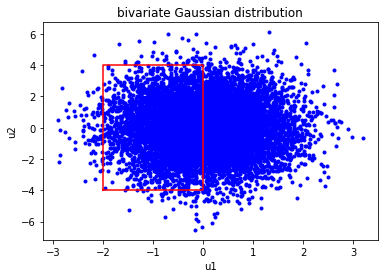

Probability: 0.4876


In [21]:
cov = np.diag(eigval)
mu = np.zeros(2)

u1,u2 = np.random.multivariate_normal(mu,cov,distr).T

# select out points
probability = len(np.where((u1>= u1mi) & (u1 <= u1ma) & (u2>= u2mi) & (u2 <= u2ma))[0])/float(distr)

plt.clf()
plt.title("bivariate Gaussian distribution")
plt.xlabel("u1")
plt.ylabel("u2")
plt.plot(u1,u2,'.b')
plt.plot(newregion[0],newregion[1],'-r')
plt.show()

print("Probability: {}".format(probability))


#### Discussion

 These methods are now equal since the distribution is symmetric aboutthe u1=u2 axis and not skewed.

## How long this is assignment take you?

4 hours
If you wanted the regions plotted with the distributions, say this in the beginning of the problem please.